## K-NEAREST NEIGHOURS (KNN) ALGORITHM


#### INTRODUCTION

This notebook showcases the implemention of the KNN algorithm using the scikit-learn library. This notebook was developed from the scratch to demostrate a significant practical and theoretical understanding of the underlying machine learning algorithm. 

#### LOG OF CHANGES

This log embodies all the computations carrried out for this analysis and how they affect result of the analysis. The log is structured to follows the Cross Industry Standard Process for Data Mining (CRISP-DM) model, and the changes were logged under each of the six phases as follows:

**1. Business understanding**

The analysis focuses on enhancing the quality of milk through machine learning in the milk industry. This will be achieved by predicting milk grades (Low, Medium, High) based on parameters like pH, Temperature, Taste, Odor, Fat, Turbidity, and Color. This analysis will help to automate quality assessment, optimize resource usage, and deliver higher-quality products.

Data Understanding: 

**2. Data Understanding**

The dataset used for this analysis was gotten from kaggle (https://www.kaggle.com/datasets/cpluzshrijayan/milkquality). The dataset includes the 7 key parameters mention above and a target variable representing milk grades. In the dataset, if the  Taste, Odor, Fat, and Turbidity are satisfied with optimal conditions then they will assign 1 otherwise 0.

**3. Data Preparation**

In the data preprocessing stage, the target varaible grade which is a  categorical features was enconded using a label encoder, making it suitable to be feed into the algorithm.

**4. Modelling**

The following  were implemented during the modelling phase:

**a) Standardizing the features**

**Change:** All the features were standardized to keep them within the same scale

**Result:** The accuracy of the performance of the model before standardization was accuracy: 0.99, precision: 0.98, recall: 1.0 and score: 0.99. After standardization the perfromance was accuracy: 0.98, precision: 0.98, recall: 0.94 and score: 0.96.  


**b) Balancing the target variable**

**Change:** The target variable was slightly imbalanced, hence oversampling was done using SMOTE

**Result:** Oversampling using SMOTE did not have a significant effect the model perfromance of the model.  

**c) Using cross validation**

**Change:** The datset was splited into 5 folds via random sampling.

**Result:** This had little effect on the performance of the model as well.

**d) Examining different number of folds**

**Change:** A function was created to test different values of K, and examine the accuracy.

**Result:** The accuracy didn't change much when will alter the number of folds. 

**e) Using difference distance measures**

**Change:** Other than the defualt distance measure (Minkowski distance), Euclidean and the Manhattan distances were used to examine the performance of the model.  

**Result:** The performance of the model was not affected by the change of the distance measures

**4. Evaluation:**

The performance of the model was evaluated using various metric scores including accuracy, precision, recall and f1-score.


**5. Deployment:**

The best model was saved as a pickle file and was deployed as a web application which which runs locally. The name of the web app is Urinary_app, which will be remotely hosted before the final submission.



#### ANALYSIS

First things first, let's import the neccessary libraries.


#### 

In [133]:
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


Next, we will load the data set and take a look at it.

In [119]:
# load the drug analysis dataset
df = pd.read_csv('milknew.csv')

In [120]:
# check the first few rows of the dataframe
df.head()


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [66]:
# Examine the shape of the dataset
df.shape

(1059, 8)

Now, we will check the distribution of the target variable

In [67]:
df.Grade.value_counts()

Grade
low       429
medium    374
high      256
Name: count, dtype: int64

The distribution shows that the dataset is a bit imbalanced

In [68]:
# Examine the columns in the dataframe
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [69]:
# check for missing values
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

There are no missing values in the dataset

The target variable is categorical, we need to convert it to numerical values. We can use the a label encoder to convert the categorical values to numerical values. 

In [70]:
# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])
categorical_columns.head()

,Grade
0,high
1,high
2,low
3,low
4,medium


In [71]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame and apply label encoding
for column in categorical_columns.columns:
    df[column] = label_encoder.fit_transform(df[column])

In [72]:
df.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,2
1055,6.7,38,1,0,1,0,255,0
1056,3.0,40,1,1,1,1,255,1
1057,6.8,43,1,0,1,0,250,0
1058,8.6,55,0,1,1,1,255,1


In [73]:
# Display the class labels
class_labels = label_encoder.classes_
print(f'Class Labels: {class_labels}')

Class Labels: ['high' 'low' 'medium']


Since Label encoder encodes based on alphabetical order, we can see that high is encoded as 0, low as 1, medium as 2. 

Great! Now that we have encoded the categorical columns, we can proceed to train a KNN classifier using the encoded data.

In [74]:
# Split the data into features and target
X = df.drop('Grade', axis=1)
y = df['Grade']

# take a copy of the features
features = X.copy()


In [75]:
X.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour'], dtype='object')

Now, we can split the dataset into a training set and a test set. We will use 80% of the data for training and 20% for testing.

In [76]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Create a Random Forest Classifier instance
knn = KNeighborsClassifier() 

In [78]:
# Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [80]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {accuracy:.3f}")

The accuracy of the model is 0.986


In [81]:
# calculate the accuracy using confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[48,  0,  0],
       [ 0, 76,  2],
       [ 1,  0, 85]], dtype=int64)

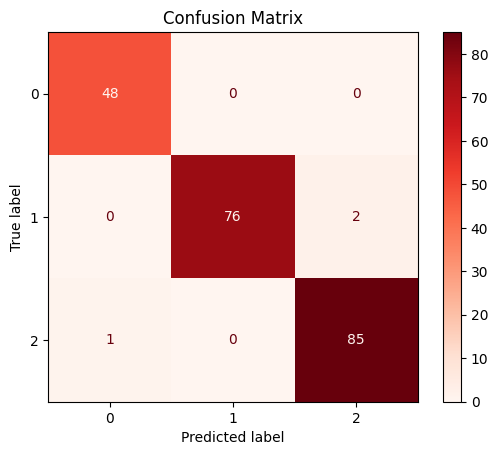

In [82]:
# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Reds', values_format='d', xticks_rotation='horizontal')
plt.title('Confusion Matrix')
plt.show()

In [83]:
# display the classification report
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.97      0.99        78
           2       0.98      0.99      0.98        86

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



The model's accuracy is 0.99, which is quite good. Also, the precision, recall, and F1-score are 0.98, 1.0 and 0.99 respectively.

Next we will standardize the features using the StandardScaler class from the scikit-learn library and compare the results.

In [122]:
# standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

Now, we can split the standardized dataset into a training set and a test set. We will use 80% of the data for training and 20% for testing.

In [123]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# Create a Random Forest Classifier instance
knn1 =  KNeighborsClassifier()

In [125]:
# Fit the model
knn1.fit(X_train, y_train)

KNeighborsClassifier()

In [126]:
# Make predictions on the test set
y_pred = knn1.predict(X_test)

In [127]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {accuracy:.3f}")

The accuracy of the model is 0.976


In [128]:
# calculate the accuracy using confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[45,  3,  0],
       [ 1, 76,  1],
       [ 0,  0, 86]], dtype=int64)

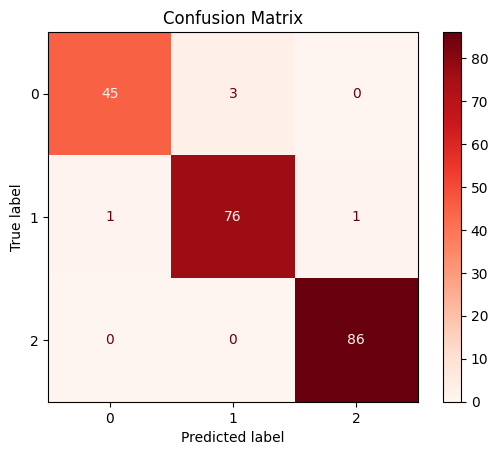

In [129]:
# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Reds', values_format='d', xticks_rotation='horizontal')
plt.title('Confusion Matrix')
plt.show()

In [131]:
# display the classification report
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        48
           1       0.96      0.97      0.97        78
           2       0.99      1.00      0.99        86

    accuracy                           0.98       212
   macro avg       0.98      0.97      0.97       212
weighted avg       0.98      0.98      0.98       212



The model has an accuracy improved to 0.98, and a precision of 0.98, recall of 0.94 and an f1-score of 0.96

#### Balancing the target variable

Let us examine the distribution of the target variable visually using a bar chart.


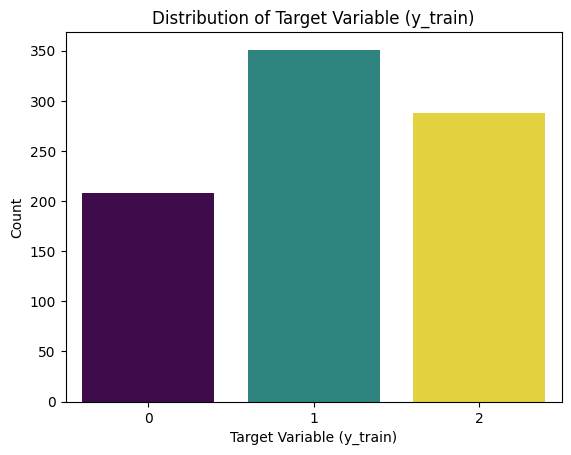

In [93]:
# Visualize the distribution of the target variable using a bar plot using matplotlib and seaborn

df = pd.DataFrame({'Target': y_train})

# Plotting the bar plot using Seaborn
sns.countplot(x='Target', data=df, hue='Target', palette='viridis', legend=False)
plt.xlabel('Target Variable (y_train)')
plt.ylabel('Count')
plt.title('Distribution of Target Variable (y_train)')
plt.show()


The target variable is unbalanced, so we need to balance it using the SMOTE technique.

In [94]:
# We will balance the dataset by using the SMOTE technique
smote = SMOTE(random_state=42)

In [95]:
# Fit the SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [96]:
# check the shape of the resampled and former data
X_train_smote.shape, y_train_smote.shape, X_train.shape, y_train.shape

((1053, 7), (1053,), (847, 7), (847,))

In [97]:
# Create a Random Forest Classifier instance
knn2 = KNeighborsClassifier()

In [98]:
# Now we can train the model using the resampled data
knn2.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [99]:
# Make predictions on the test data
y_pred = knn2.predict(X_test)


In [100]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9905660377358491

In [101]:
# calculate the accuracy using confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[48,  0,  0],
       [ 1, 76,  1],
       [ 0,  0, 86]], dtype=int64)

In [102]:
# display the classification report
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.97      0.99        78
           2       0.99      1.00      0.99        86

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



Oversampling using SMOTE did not have a significant effect the model perfromance of the model.  

#### Using cross validation

Now, we will use cross-validation to evaluate the model's performance. This will be achieved by splitting the dataset into 5 folds and training the model on 4 folds and testing it on the remaining fold. This process will be repeated 5 times, with each fold serving as the test set once. The average accuracy of the model will be calculated.

In [103]:
# Create a Random Forest Classifier instance
knn3 = KNeighborsClassifier()


In [104]:
# Use cross-validation to evaluate the model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [105]:
# Perform cross-validated scoring
cv_scores  = cross_val_score(knn3, X, y, scoring='accuracy', cv=cv)

In [106]:
# Print the cross-validated accuracy scores
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

Cross-validated Accuracy Scores: [0.99056604 0.99056604 1.         1.         0.99526066]
Mean Accuracy: 0.9952785477957613


There a little difference in the accuracy of the model after the cross-validation. The accuracy of the model improved by 0.02

#### Create a function to perform cross-validation

In [107]:
def cross_val_accuracy(X, y, folds):
    
    knn4 = KNeighborsClassifier()

    # Perform cross-validation and get accuracy scores for each fold
    accuracy_scores = cross_val_score(knn4, X, y, cv=folds)

    # Calculate mean accuracy
    mean_accuracy = np.mean(accuracy_scores)

    return accuracy_scores, mean_accuracy


In [108]:
# trying a range of folds
for i in range(2, 7):
    print(f'For {i} folds:')
    accuracy_scores, mean_accuracy = cross_val_accuracy(X, y, i)
    print(f'Accuracy scores: {accuracy_scores}')
    print(f'Mean accuracy: {mean_accuracy:.4f}')
    print('\n')


For 2 folds:
Accuracy scores: [0.98867925 0.97542533]
Mean accuracy: 0.9821


For 3 folds:
Accuracy scores: [0.99716714 0.98866856 0.98866856]
Mean accuracy: 0.9915


For 4 folds:
Accuracy scores: [0.99622642 1.         0.98490566 0.98484848]
Mean accuracy: 0.9915


For 5 folds:
Accuracy scores: [0.99528302 1.         0.99056604 1.         0.98104265]
Mean accuracy: 0.9934


For 6 folds:
Accuracy scores: [0.99435028 1.         1.         0.97727273 0.99431818 0.98295455]
Mean accuracy: 0.9915




The above result shows that the model's accuracy is consistent across different folds. This is a good sign that the model is not overfitting to the training data.

#### Using different distances

**a) Euclidean distance**

Since the default distance measure is the Minkowski distance, we will attempt to use the Euclidean and the Manhattan distance and check the performance of the model

In [109]:

# instantiate the model using Euclidean distance
knn5 = KNeighborsClassifier(metric='euclidean')

In [110]:
# Fit the model
knn5.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [111]:
# Make predictions on the test set
y_pred = knn5.predict(X_test)

In [112]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {accuracy:.3f}")

The accuracy of the model is 0.976


The accuracy is quite close to that of Minkowski.

**b) Manhattan distance**

In [113]:

# instantiate the model using Manhattan distance
knn6 = KNeighborsClassifier(metric = 'manhattan')

In [114]:
# Fit the model
knn6.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [115]:
# Make predictions on the test set
y_pred = knn6.predict(X_test)

In [116]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {accuracy:.3f}")

The accuracy of the model is 0.976


The Euclidean and Manhattan distances gave the same result.

#### Saving the model as a pickle file

In [117]:
# Save the model to a file using pickle
with open('knn.pkl', 'wb') as file:
    pickle.dump(knn, file)